In [1]:
import networkx as nx
import random as rd
opts = {"with_labels": True, "node_color":'g'}

In [35]:
#Funcion para seleccionar los nodos que se reconectan, a partir de nkp
def set_nodes_to_reconnect(n,k,p):
    nodes = []
    for i in range(0,round(n*k*p)):
        while len(nodes) < round(n*k*p):
            node = rd.randint(0,n-1)
            if not node in nodes: 
                nodes.append(node)
    print("Los nodos que se van a recablear son:", nodes)
    return nodes


#Funcion para conectar los nodos
def connect_nodes(G,nodes):
    for sender in nodes:
        receiver = rd.randint(0,len(G)-1)
        if receiver != sender and not G.has_edge(sender, receiver):
            G.remove_edge(sender, (sender+1)%len(G))
            G.add_edge(sender, receiver)
    return G


#Inicia una red conectando cada nodo a sus 2k vecinos
def create_SW_network(n, k,p):
    if k > 0.16*n:
        raise Exception("k debe ser <= que el 16% de n")
    G = nx.cycle_graph(n)
    for v in G:
        for o in range(2, k+1): #decide hasta que nodo se va a conectar
            G.add_edge(v, (v+o) % n)#crea la conexion
    print("El numero de conexiones de largo alcance a recablear son:",round(n*k*p))
    nodes = set_nodes_to_reconnect(n,k,p)
    G = connect_nodes(G, nodes)
    return G


El numero de conexiones de largo alcance a recablear son: 6
Los nodos que se van a recablear son: [7, 14, 12, 1, 0, 3]


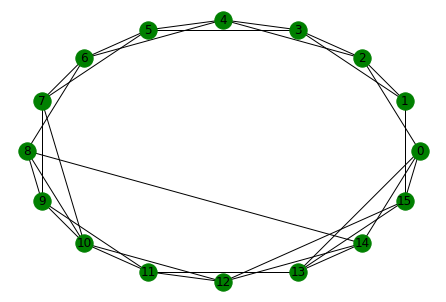

In [39]:
G = create_SW_network(16,2,0.2)
nx.draw_circular(G,**opts)